# Polygons

`scikit-geometry` can handle polygons, as well as polygons with holes. Polygons can be created from lists of points.

In [2]:
import skgeom as sg
from skgeom.draw import draw

In [4]:
poly = sg.Polygon([sg.Point2(0, 0), sg.Point2(0, 3), sg.Point2(3, 3)])

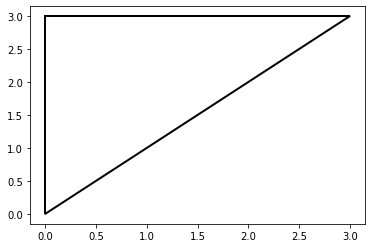

In [5]:
draw(poly)

We can check wether a given point is _inside_ the polygon (a negative sign means outside, positive means inside):

In [5]:
poly.oriented_side(sg.Point2(1, 2))

Sign.NEGATIVE

In [6]:
poly.oriented_side(sg.Point2(2, 1))

Sign.POSITIVE

Calculate the bounding box

In [7]:
poly.bbox()

Bbox_2(0, 0, 3, 3)

Compute the area of the polygon. Note: the sign depends on the order of the polygon (clockwise → negative, counter-clockwise → positive).

In [8]:
poly.area()

-4.5

In [9]:
poly.orientation() == sg.Sign.CLOCKWISE

True

In [10]:
poly.is_convex()

True

In [11]:
poly.is_simple()

True

## Polygon with Holes

We can cut out an area of a Polygon by adding one or multiple holes.

In [12]:
hole = sg.Polygon([
    sg.Point2(0.5, 2.5), 
    sg.Point2(1.0, 2.5),
    sg.Point2(1.0, 2.0), 
    sg.Point2(0.5, 2.0)])
poly_with_hole = sg.PolygonWithHoles(poly, [hole])

In [13]:
from skgeom.draw import to_list_of_tuples, draw_polygon
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib import pyplot as plt

def draw_poly_with_hole(poly):
    if isinstance(poly, list):
        for p in poly:
            draw_poly_with_hole(p)
    else:
        draw_polygon(poly.outer_boundary(), facecolor="lightgray")
        for hole in poly.holes:
            hole_length = 0
            vertices = to_list_of_tuples(hole.vertices) + [(0, 0)]
            for v in hole.vertices:
                hole_length += 1

            codes = [Path.MOVETO] + [Path.LINETO] * (hole_length - 1) + [Path.CLOSEPOLY]
            path = Path(vertices, codes)
            plt.gca().add_patch(
                patches.PathPatch(path, facecolor="white", linewidth=2)
            )

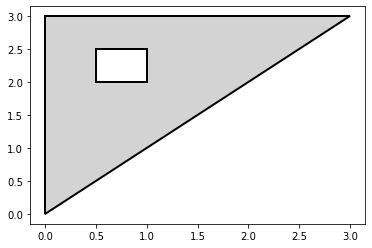

In [14]:
draw_poly_with_hole(poly_with_hole)

### Boolean operations on Polygons

*scikit-geometry* supports boolean operations on polygons, such as computing the union, difference and intersection between two polygons (or polygons with holes).

In [15]:
poly1 = sg.Polygon([sg.Point2(0, 0), sg.Point2(0, 3), sg.Point2(3, 3), sg.Point2(3, 0)])
poly2 = sg.Polygon([sg.Point2(2, 2), sg.Point2(2, 5), sg.Point2(5, 5), sg.Point2(5, 2)])

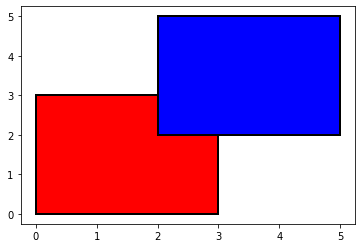

In [16]:
draw_polygon(poly1, facecolor='red')
draw_polygon(poly2, facecolor='blue')

In [17]:
from skgeom import boolean_set

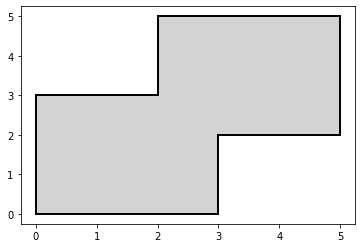

In [18]:
draw_poly_with_hole(boolean_set.join(poly1, poly2))

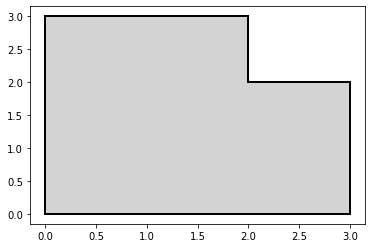

In [19]:
draw_poly_with_hole(boolean_set.difference(poly1, poly2))

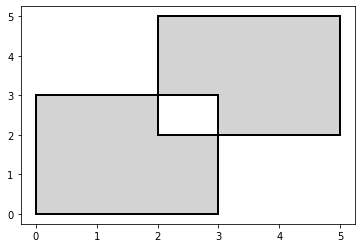

In [20]:
draw_poly_with_hole(boolean_set.symmetric_difference(poly1, poly2))

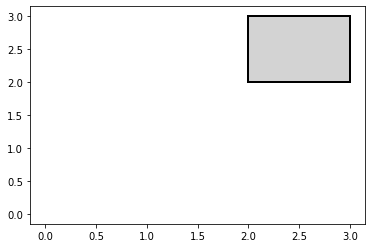

In [21]:
draw_poly_with_hole(boolean_set.intersect(poly1, poly2))

## Minkowski Sum of 2 Polygons

We can compute the minkowski sum of two polygons easily (i.e. offsetting a polygon with another polygon).

In [22]:
from skgeom import minkowski

In [23]:
p1 = sg.Polygon([sg.Point2(-1, -1), sg.Point2(1, -1), sg.Point2(0, 1)])
p2 = sg.Polygon([sg.Point2(3, -1), sg.Point2(5, -1), sg.Point2(5, 1), sg.Point2(3, 1)])

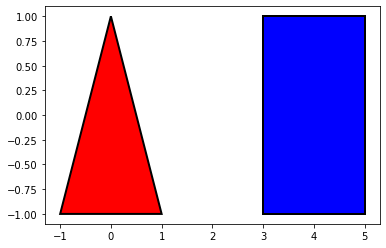

In [36]:
draw(p1, facecolor='red')
draw(p2, facecolor='blue')

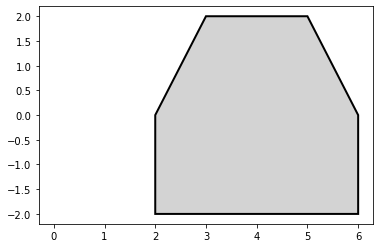

In [37]:
result = minkowski.minkowski_sum(p1, p2)
draw_poly_with_hole(result)